### Questions
* Why is there a difference between population statistics and sample statistics? 
    * Ex: sd den -> pop (n) and sample (n-1)

### Objectives
YWBAT
* create a column of data in a dataframe using pandas
* create a column of data in a dataframe using pandas functions such as apply, map, applymap
* locate specific parts of a dataframe using iloc/loc


### Keyterms
* D.R.Y. Code - Do Not Repeat Yourself

### Outline

In [30]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()

In [4]:
data = iris.data
labels = iris.target
columns = iris.feature_names

In [5]:
df = pd.DataFrame(data, columns=columns)
df['label'] = labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
type(df.columns), df.columns

(pandas.core.indexes.base.Index,
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)', 'label'],
       dtype='object'))

In [18]:
# Let's rename our columns
# remove the (cm)
# add an underscore between all the words

df.columns = df.columns.str.replace("\(cm\)", "").str.strip().str.replace(" ", "_")

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Create a new column 'sepl_sepw_ratio' = sepal_length / sepal_width
# i want this rounded to 2 decimal places

df['sepl_sepw_ratio'] = np.round(df['sepal_length'] / df['sepal_width'], 2)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,sepl_sepw_ratio
0,5.1,3.5,1.4,0.2,0,1.46
1,4.9,3.0,1.4,0.2,0,1.63
2,4.7,3.2,1.3,0.2,0,1.47
3,4.6,3.1,1.5,0.2,0,1.48
4,5.0,3.6,1.4,0.2,0,1.39


In [27]:
# create a new column that is the distance from the petal_width to max petal_width
# petl_from_max

df['petl_from_max'] = np.abs(df['petal_width'].max() - df['petal_width'])

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,sepl_sepw_ratio,petl_from_max
0,5.1,3.5,1.4,0.2,0,1.46,2.3
1,4.9,3.0,1.4,0.2,0,1.63,2.3
2,4.7,3.2,1.3,0.2,0,1.47,2.3
3,4.6,3.1,1.5,0.2,0,1.48,2.3
4,5.0,3.6,1.4,0.2,0,1.39,2.3


In [64]:
# Let's look at our data
# Let's build some Histograms!!!!!!!


def plot_hist(df, column, figsize=(8, 5), bins=20):
    plt.figure(figsize=figsize)
    plt.grid(linestyle='dashed', zorder=0)
    fontsize=14
    plt.hist(df[column], color='purple', bins=bins, alpha=0.8, zorder=2)
    plt.title(column.replace("_", " ").title(), fontsize=fontsize)
    plt.xlabel("Values", fontsize=fontsize)
    plt.ylabel("Counts", fontsize=fontsize)
    plt.show()

In [54]:
df.shape

(150, 7)

In [57]:
some_data = np.random.normal(20, 5, 150)
some_data

array([17.12071604, 25.66580934, 20.62274247, 22.13662722, 16.93874946,
       18.73285555, 20.66639603, 15.29025398, 18.31811318, 25.47233099,
       21.38555069, 16.86060351, 14.32418648, 24.67723333, 18.15569424,
       22.36864255, 34.1931317 , 14.75851764,  7.85792136, 15.16393806,
       12.89682151, 11.16897659, 27.76268123, 17.0633767 , 23.56333961,
       27.88690094, 15.6278967 , 25.60252529, 14.08364621, 21.00138143,
       14.05005119, 16.3468268 , 14.98523391, 27.70406212, 16.28772932,
        9.05960136, 25.74483468, 22.60323419, 13.69974119, 25.36529523,
       30.03182255, 15.36772373, 19.10536594, 17.00740858, 19.55396585,
       20.44495147, 23.25889255,  7.12289569, 17.76076908, 15.91177918,
        9.32291176, 20.47000031, 21.74930464, 26.88539713, 26.60418612,
       21.20031571, 18.55341498, 20.14924666, 21.83299833,  4.10371233,
       21.29368581, 11.48449202, 26.82574847, 24.06483939, 31.21907099,
       21.3324146 , 20.70316003, 25.24820681, 18.33150112, 17.43

In [58]:
some_data > 20

array([False,  True,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,

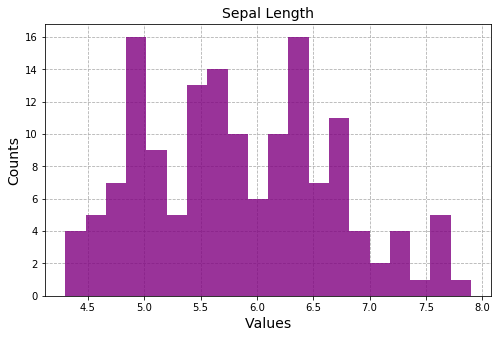

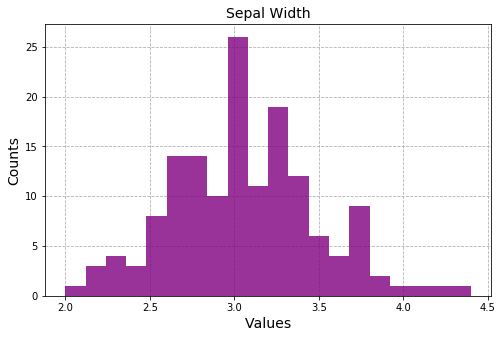

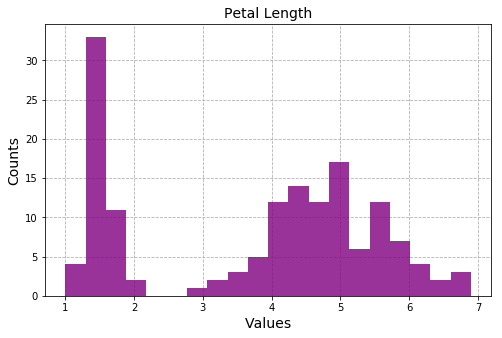

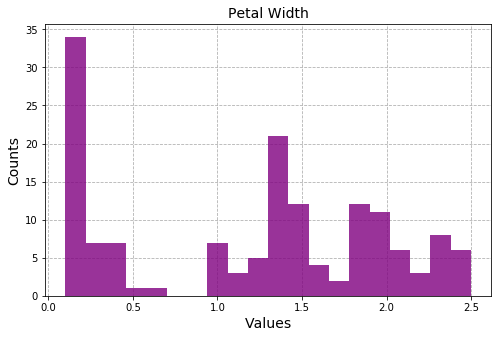

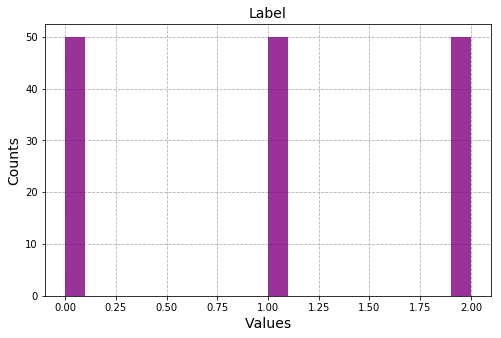

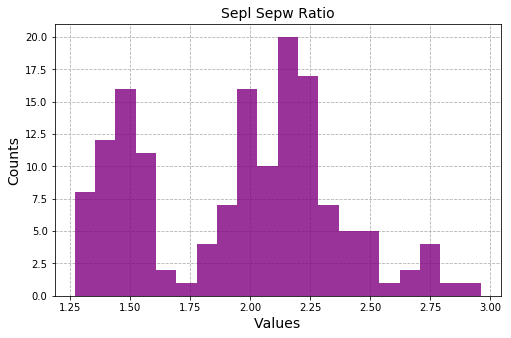

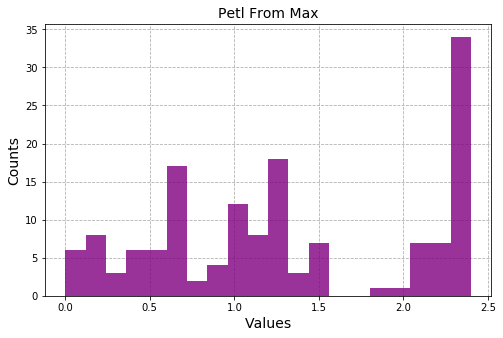

In [53]:
for column in df.columns:
    plot_hist(df=df, column=column)

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,sepl_sepw_ratio,petl_from_max
0,5.1,3.5,1.4,0.2,0,1.46,2.3
1,4.9,3.0,1.4,0.2,0,1.63,2.3
2,4.7,3.2,1.3,0.2,0,1.47,2.3
3,4.6,3.1,1.5,0.2,0,1.48,2.3
4,5.0,3.6,1.4,0.2,0,1.39,2.3


In [62]:
# let's get petal lengths only above 2.5

df_petL_greater_2_5 = df.loc[df['petal_length']>2.5]

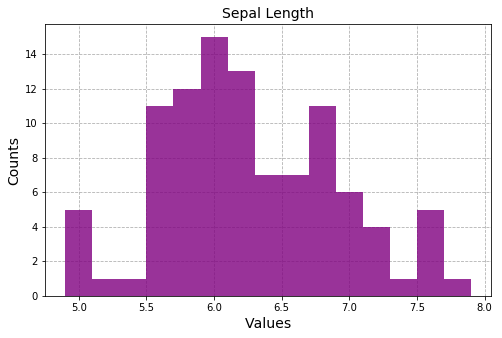

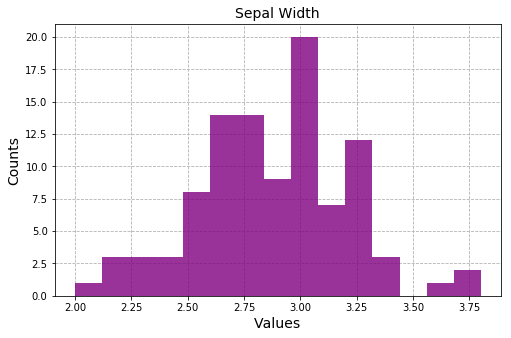

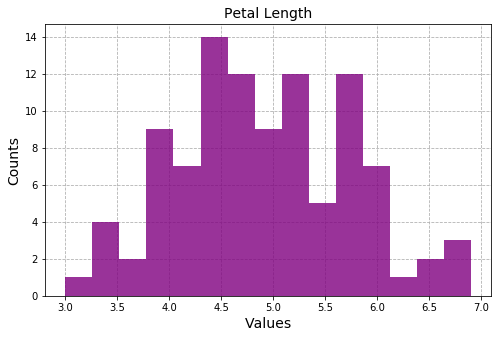

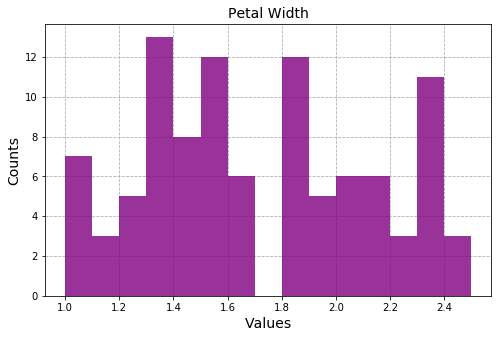

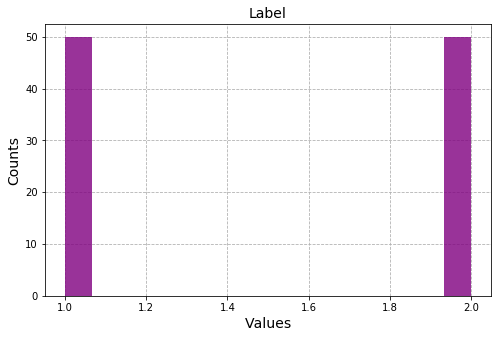

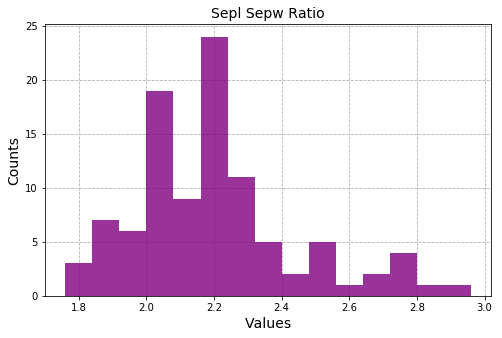

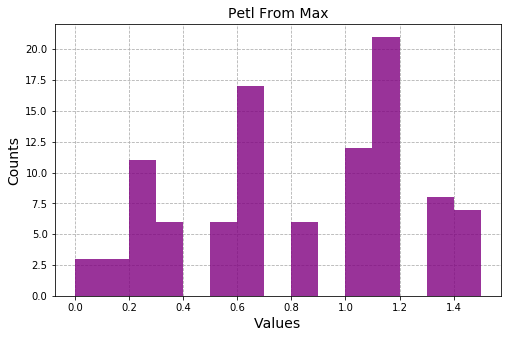

In [66]:
for column in df_petL_greater_2_5.columns:
    plot_hist(df_petL_greater_2_5, column, bins=15)

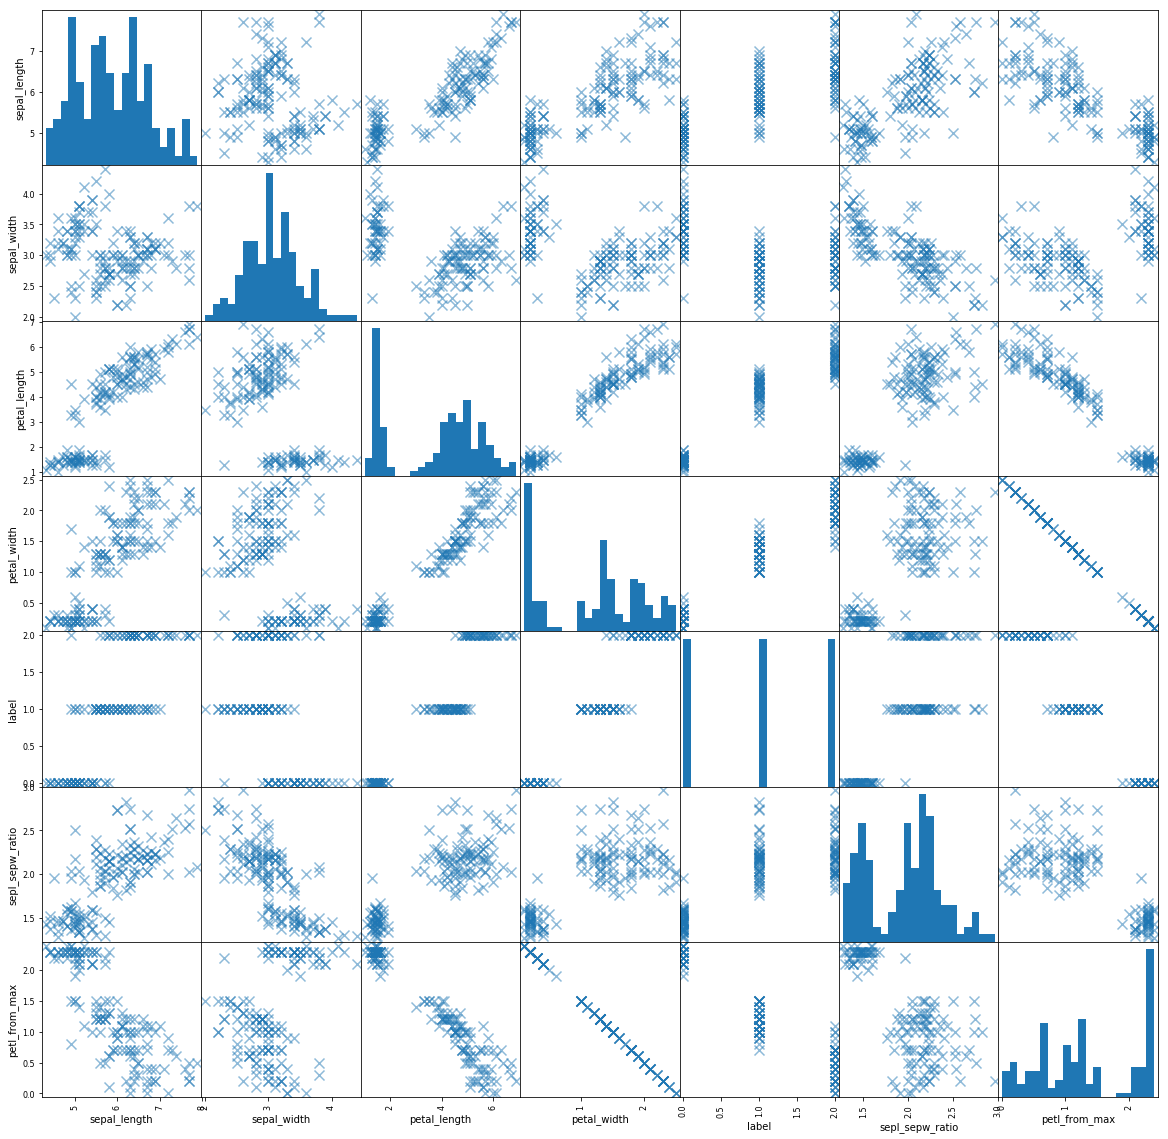

In [74]:
# This is a great first look at your data

pd.plotting.scatter_matrix(df, figsize=(20, 20), s=100, marker='x', hist_kwds={"bins":20})
plt.show()

In [76]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

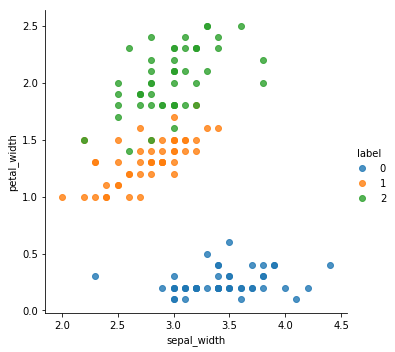

In [79]:
# Let's look a plot of sepal_width vs petal_width colored by label
sns.lmplot(x='sepal_width', y='petal_width', data=df, hue='label', fit_reg=False)
plt.show()

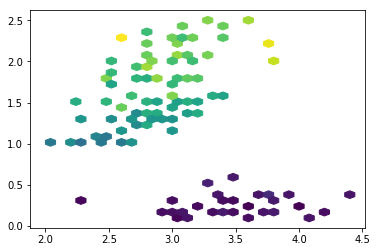

In [81]:
plt.hexbin(df['sepal_width'], df['petal_width'], C=df['petal_length'], gridsize=30)
plt.show()

In [92]:
corr = df.corr().abs()
corr

,sepal_length,sepal_width,petal_length,petal_width,label,sepl_sepw_ratio,petl_from_max
sepal_length,1.000000,0.117570,0.871754,0.817941,0.782561,0.729862,0.817941
sepal_width,0.117570,1.000000,0.428440,0.366126,0.426658,0.748200,0.366126
petal_length,0.871754,0.428440,1.000000,0.962865,0.949035,0.837523,0.962865
petal_width,0.817941,0.366126,0.962865,1.000000,0.956547,0.753437,1.000000
label,0.782561,0.426658,0.949035,0.956547,1.000000,0.777334,0.956547
sepl_sepw_ratio,0.729862,0.748200,0.837523,0.753437,0.777334,1.000000,0.753437
petl_from_max,0.817941,0.366126,0.962865,1.000000,0.956547,0.753437,1.000000


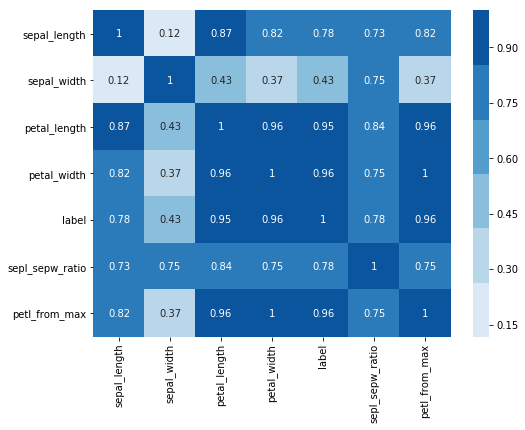

In [90]:
corr = df.corr().abs()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap=sns.color_palette('Blues'), annot=True)
plt.show()

### Assessment